In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importar dados

In [2]:
spotify = pd.read_csv('spotify.csv')

## Check

Verificar final do database

In [3]:
spotify.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Apagar linhas vazias

In [4]:
spotify.dropna(inplace=True)

Verificar inicio do database

In [5]:
spotify.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


## BPM
 As 5 musicas com maior BPM

In [6]:
spotify.sort_values('bpm').tail(5)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
227,The Motto,Drake,canadian hip hop,2011.0,2020‑06‑22,202.0,44.0,77.0,-9.0,11.0,39.0,182.0,0.0,36.0,79.0,2012.0,Solo
969,Pure Water (with Migos),Mustard,cali rap,2019.0,2020‑06‑22,202.0,56.0,68.0,-6.0,34.0,14.0,192.0,17.0,13.0,80.0,2019.0,Solo
898,"BIG BANK (feat. 2 Chainz, Big Sean, Nicki Minaj)",YG,cali rap,2018.0,2020‑06‑22,204.0,35.0,75.0,-8.0,9.0,11.0,237.0,1.0,33.0,73.0,2018.0,Solo
563,FourFiveSeconds,Rihanna,barbadian pop,2015.0,2020‑06‑19,206.0,27.0,58.0,-6.0,13.0,35.0,188.0,88.0,5.0,82.0,2015.0,Solo
109,Honey Bee,Blake Shelton,contemporary country,2011.0,2020‑06‑16,206.0,85.0,48.0,-5.0,12.0,72.0,211.0,0.0,4.0,69.0,2011.0,Solo


Valores de BPM que mais aparecem

In [7]:
spotify['bpm'].value_counts().head()

128.0    57
120.0    55
100.0    40
125.0    35
126.0    33
Name: bpm, dtype: int64

## Títulos
Títulos únicos

In [8]:
sum(spotify['title'].value_counts() == 1)

893

3 músicas que mais aparecem

In [9]:
spotify['title'].value_counts().head(3)

Paradise    3
Sorry       3
Don't       3
Name: title, dtype: int64

## Feat
### Artistas convidados

Títulos com "feat."

In [10]:
feat = spotify['title'].apply(lambda f: '(feat.' in f)
#wi = spotify['title'].apply(lambda f: '(with' in f)

Coluna dos convidados

In [11]:
convidados_feat = spotify[(feat)]['title'].apply(lambda str: str.split('(')[1][6:-1])
spotify['feat'] = convidados_feat
#convidados_with = spotify[(wi)]['title'].apply(lambda str: str.split('(')[1][5:-1])

Número de convidados (contar separadores)

In [12]:
def contar_convidados(str):
    if (',' in str) and ('&' in str):
        return len(str.split(',')) + 2
    elif ('&' in str):
        return 2
    else:
        return 1
    

spotify['nfeat']=spotify['feat'].dropna().apply(lambda str: contar_convidados(str))
spotify['nfeat'].fillna(value = 0, inplace=True)
spotify

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,feat,nfeat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo,Katy Perry,1.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo,Ke$ha,1.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo,NaN,0.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo,Hayley Williams of Paramore,1.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo,Bruno Mars,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Cruel Summer,Taylor Swift,pop,2019.0,2021‑08‑17,170.0,70.0,55.0,-6.0,11.0,56.0,178.0,12.0,16.0,82.0,2019.0,Solo,NaN,0.0
994,You Need To Calm Down,Taylor Swift,pop,2019.0,2020‑06‑22,85.0,67.0,77.0,-6.0,6.0,71.0,171.0,1.0,6.0,81.0,2019.0,Solo,NaN,0.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019.0,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019.0,Solo,Idris Elba,1.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo,Aitch,1.0


## Data



In [13]:
spotify['added'] = pd.to_datetime(spotify['added'], format = '%Y‑%m‑%d')
spotify['added']

0     2022-02-17
1     2022-02-17
2     2022-02-17
3     2022-02-17
4     2022-02-17
         ...    
993   2021-08-17
994   2020-06-22
997   2020-06-22
998   2020-08-20
999   2020-06-22
Name: added, Length: 998, dtype: datetime64[ns]

Extrair ano, mês e dia

In [14]:
spotify['year'] = spotify['added'].dt.year
spotify['year']

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
993    2021
994    2020
997    2020
998    2020
999    2020
Name: year, Length: 998, dtype: int64

In [15]:
spotify['month'] = spotify['added'].dt.month
spotify['month']

0      2
1      2
2      2
3      2
4      2
      ..
993    8
994    6
997    6
998    8
999    6
Name: month, Length: 998, dtype: int64

In [16]:
spotify['day'] = spotify['added'].dt.day
spotify['day']

0      17
1      17
2      17
3      17
4      17
       ..
993    17
994    22
997    22
998    20
999    22
Name: day, Length: 998, dtype: int64

## Artist type

<AxesSubplot:xlabel='artist type', ylabel='count'>

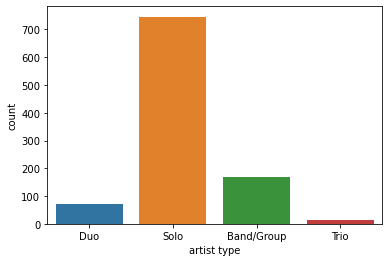

In [17]:
sns.countplot(x = 'artist type', data = spotify)

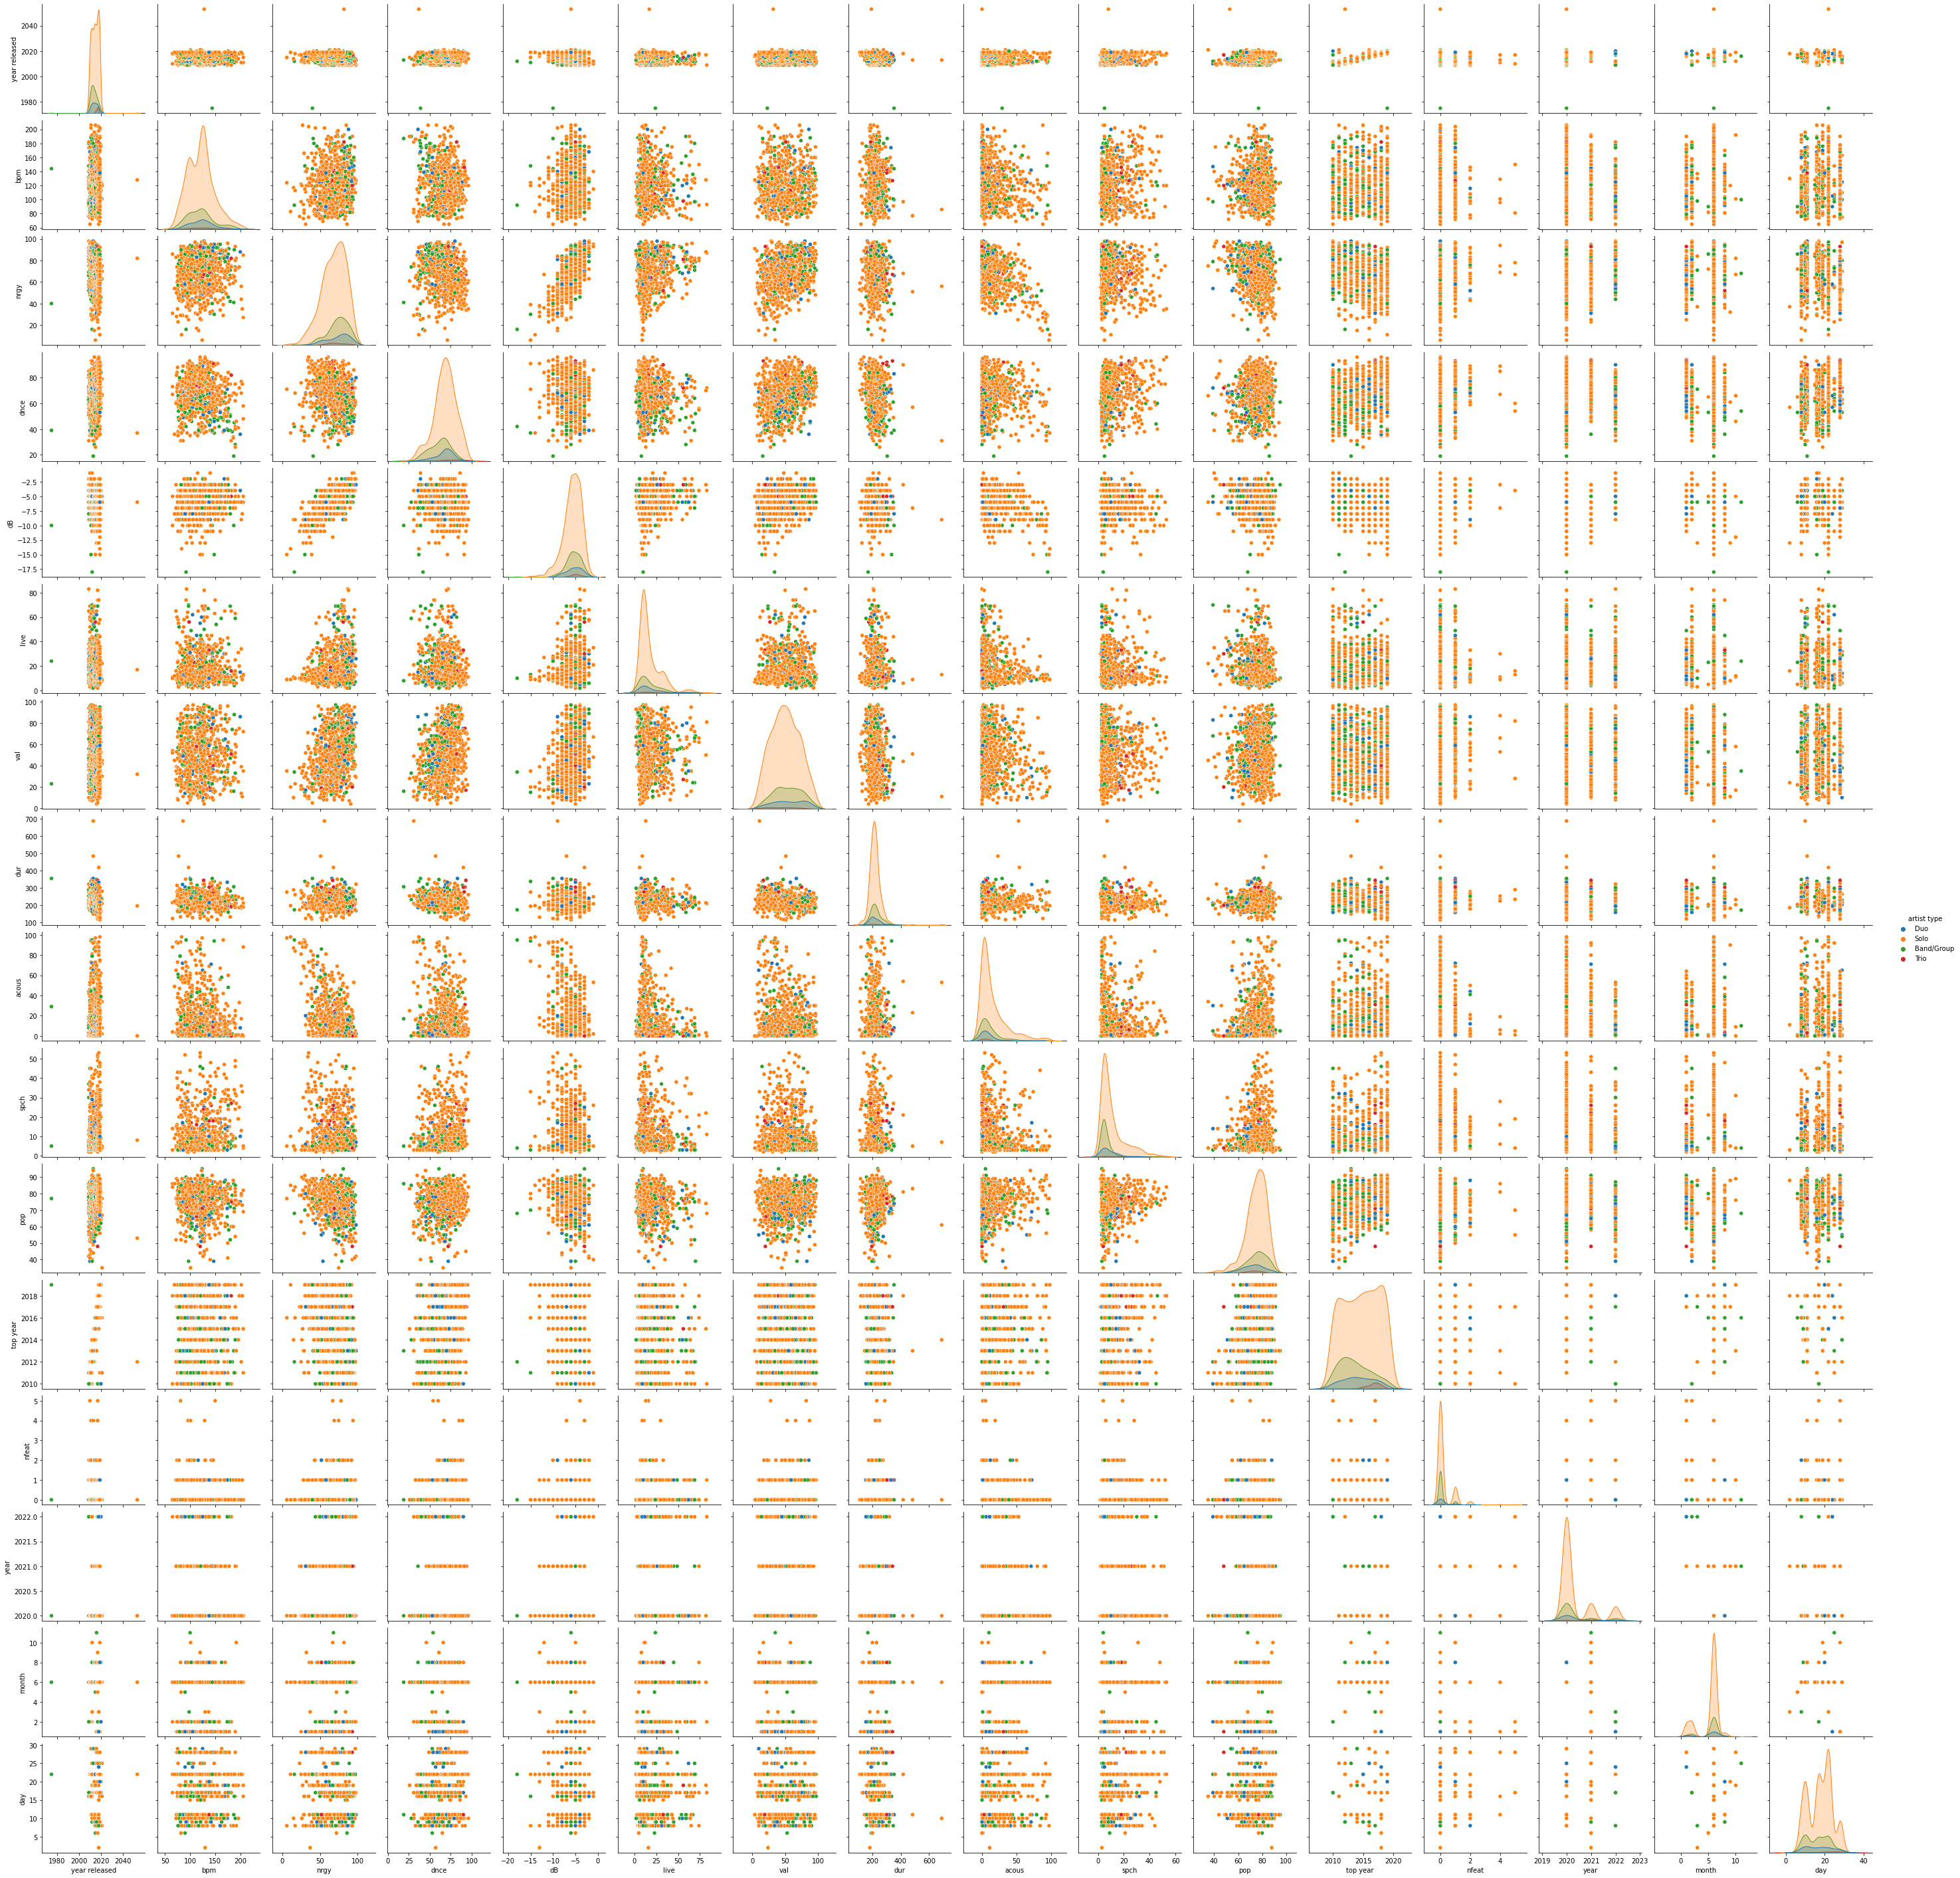

In [18]:
sns.pairplot(spotify, hue = 'artist type')

## Ano de lançamento x duração

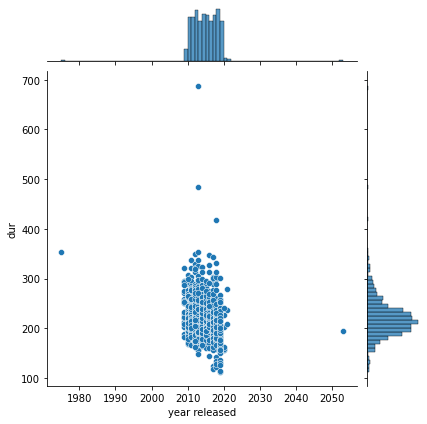

In [19]:
sns.jointplot(x = 'year released', y = 'dur', data = spotify)

Música lançada depois de 2050?

In [20]:
spotify['year released'].min()

1975.0

In [21]:
spotify['year released'].max()

2053.0

Redefinir limites

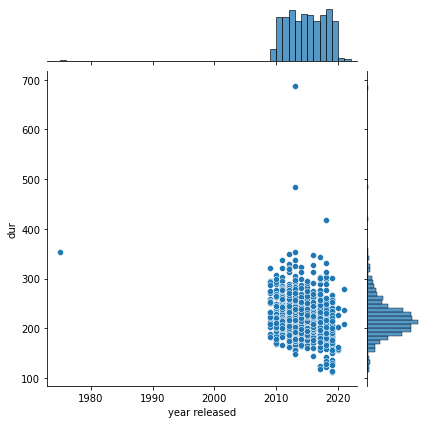

In [22]:
sns.jointplot(x = 'year released', y = 'dur', data = spotify, xlim = [1973, 2023])

## Duração x ano
Apenas para solo e duo

<AxesSubplot:xlabel='top year', ylabel='dur'>

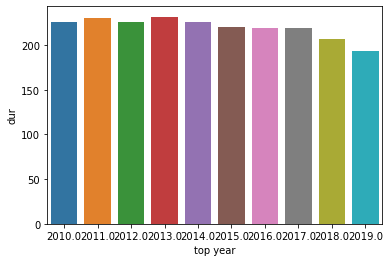

In [23]:
dur_x_ano = spotify[(spotify['artist type'] == 'Solo') | (spotify['artist type'] == 'Duo')].groupby('top year').mean()
sns.barplot(x = dur_x_ano.index, y = 'dur', data = dur_x_ano)

## Acústica x ano
Apenas para Solo e Duo

<AxesSubplot:xlabel='top year', ylabel='acous'>

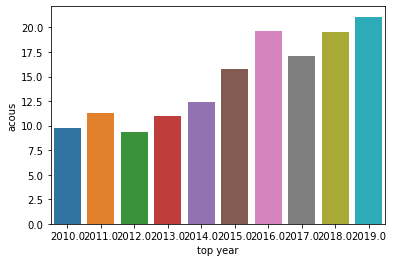

In [24]:
acous_x_ano = spotify[(spotify['artist type'] == 'Solo') | (spotify['artist type'] == 'Duo')].groupby('top year').mean()
sns.barplot(x = dur_x_ano.index, y = 'acous', data = acous_x_ano)

## Heat Map

In [25]:
h_map = spotify.groupby('top year').mean()

Checar h_map

In [26]:
spotify.groupby('top year').mean().columns

Index(['year released', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur',
       'acous', 'spch', 'pop', 'nfeat', 'year', 'month', 'day'],
      dtype='object')

Tirar colunas desnecessárias

In [28]:
h_map.drop('year released', axis = 1, inplace = True)
h_map.drop('bpm', axis = 1, inplace = True)
h_map.drop('dB', axis = 1, inplace = True)
h_map.drop('dur', axis = 1, inplace = True)
h_map.drop('nfeat', axis = 1, inplace = True)
h_map.drop('year', axis = 1, inplace = True)
h_map.drop('month', axis = 1, inplace = True)
h_map.drop('day', axis = 1, inplace = True)

Heat map

<AxesSubplot:ylabel='top year'>

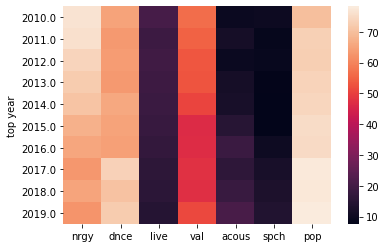

In [29]:
sns.heatmap(h_map)